uautorec (k=32) - Train loss history shape: (200,)
uautorec (k=32) - Test RMSE history shape: (200,)
uautorec1confexp (k=32) - Train loss history shape: (200,)
uautorec1confexp (k=32) - Test RMSE history shape: (200,)
uautorec2confexp (k=32) - Train loss history shape: (200,)
uautorec2confexp (k=32) - Test RMSE history shape: (200,)
uautorec3confexp (k=32) - Train loss history shape: (200,)
uautorec3confexp (k=32) - Test RMSE history shape: (200,)
uautorec4confexp (k=32) - Train loss history shape: (200,)
uautorec4confexp (k=32) - Test RMSE history shape: (200,)
Training loss plot saved to C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome\hpf200_average_train_loss_confexp_models_k32.png
Test RMSE plot saved to C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome\hpf200_average_test_rmse_confexp_models_k32.png


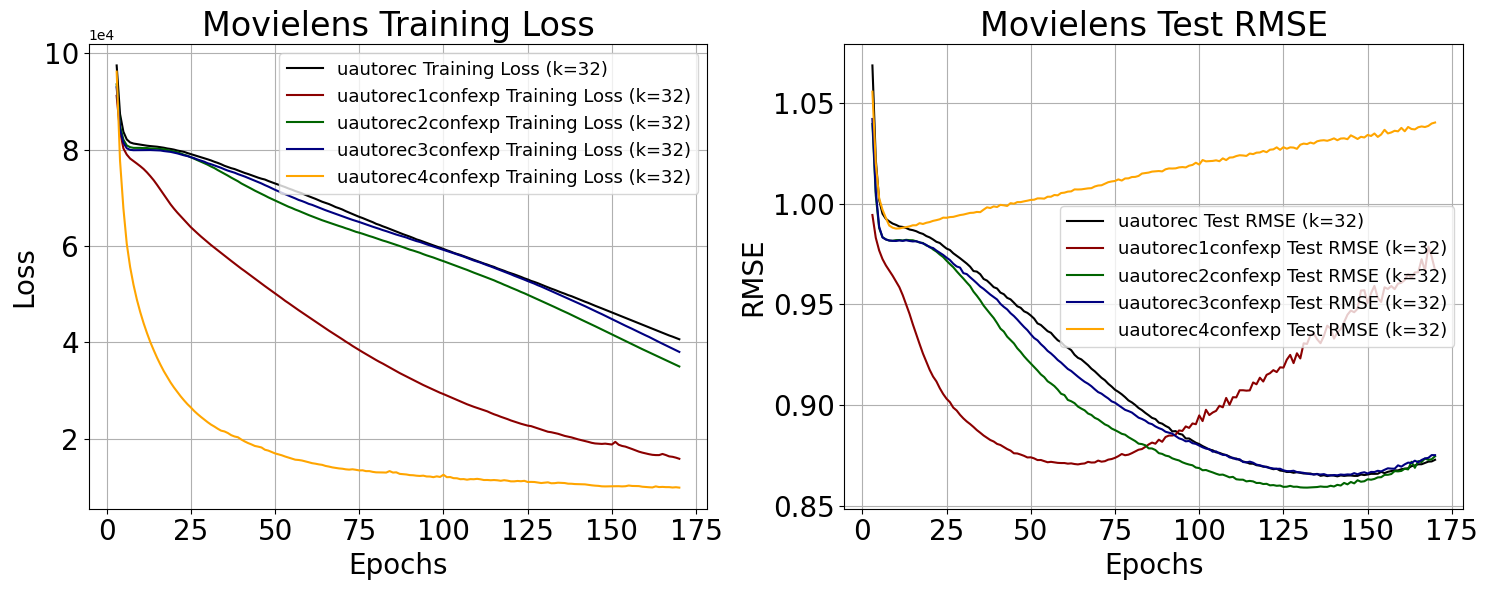

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_results(result_path, models, k_values, contype, save_plots=False, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note = '', epoch =10):
    epoch = 200

    # Define a color map for the models
    color_map = {
        'uautorec': 'black',
        'uautorec1conf': 'crimson',
        'uautorec1confexp': 'darkred',
        'uautorec2conf': 'limegreen',
        'uautorec2confexp': 'darkgreen',
        'uautorec3conf': 'lightskyblue',
        'uautorec3confexp': 'navy',
        'uautorec4conf': 'gold',
        'uautorec4confexp': 'orange'
    }

    for c in contype:
        for k in k_values:
            plt.figure(figsize=(15, 6))

            for model in models:
                class_name = model['class_name'].lower()
                class_folder = os.path.join(result_path, class_name)

                train_loss_file = os.path.join(class_folder, f'{c}{epoch}_average_train_loss_ml_k{k}.npy')
                test_rmse_file = os.path.join(class_folder, f'{c}{epoch}_average_test_rmse_ml_k{k}.npy')

                # train_loss_file = os.path.join(class_folder, f'{epoch}_train_loss_ml_k{k}.npy')
                # test_rmse_file = os.path.join(class_folder, f'{epoch}_test_rmse_ml_k{k}.npy')

                if not os.path.exists(train_loss_file) or not os.path.exists(test_rmse_file):
                    print(f"Files for {class_name} with k={k} not found.")
                    continue

                train_loss_history = np.load(train_loss_file)
                test_rmse_history = np.load(test_rmse_file)

                print(f"{class_name} (k={k}) - Train loss history shape: {train_loss_history.shape}")
                print(f"{class_name} (k={k}) - Test RMSE history shape: {test_rmse_history.shape}")

                epochs = np.arange(1, len(train_loss_history) + 1)

                color = color_map.get(class_name, 'black')  # Default color if class_name not in color_map

                # Plot training loss
                plt.subplot(1, 2, 1)
                plt.plot(epochs[2:170], train_loss_history[2:170], label=f'{class_name} Training Loss (k={k})', color=color)
                
                # Plot test RMSE
                plt.subplot(1, 2, 2)
                plt.plot(epochs[2:170], test_rmse_history[2:170], label=f'{class_name} Test RMSE (k={k})', color=color)

            plt.subplot(1, 2, 1)
            plt.xlabel('Epochs', fontsize=20)
            plt.ylabel('Loss', fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            plt.title('Movielens Training Loss', fontsize=24)
            plt.legend(fontsize=13)
            plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(4,4))
            plt.grid(True)

            plt.subplot(1, 2, 2)
            plt.xlabel('Epochs', fontsize=20)
            plt.ylabel('RMSE', fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            plt.title('Movielens Test RMSE', fontsize=24)
            plt.legend(fontsize=13)
            plt.grid(True)

            plt.tight_layout()

            if save_plots:
                if not os.path.exists(plot_path):
                    os.makedirs(plot_path)
                
                # # Save the entire figure with both subplots
                # combined_plot_file = os.path.join(plot_path, f'{epoch}_plots_{note}_k{k}.png')
                # plt.savefig(combined_plot_file)
                # print(f"Combined plot saved to {combined_plot_file}")


                # Save training loss plot separately
                plt.figure(figsize=(10, 7))
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)
                    train_loss_file = os.path.join(class_folder, f'{c}{epoch}_average_train_loss_ml_k{k}.npy')
                    if not os.path.exists(train_loss_file):
                        continue
                    train_loss_history = np.load(train_loss_file)
                    epochs = np.arange(1, len(train_loss_history) + 1)
                    color = color_map.get(class_name, 'black')
                    plt.plot(epochs[2:], train_loss_history[2:], label=f'{class_name}', color=color)
                plt.xlabel('Epochs', fontsize=20)
                plt.ylabel('Loss (x 1e4)', fontsize=20)
                plt.xticks(fontsize=20)
                plt.yticks(fontsize=20)
                plt.title('Movielens', fontsize=24)
                plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(4,4))

                plt.legend(fontsize=13)
                plt.grid(True)
                loss_plot_file = os.path.join(plot_path, f'{c}{epoch}_average_train_loss_{note}_k{k}.png')
                plt.savefig(loss_plot_file)
                print(f"Training loss plot saved to {loss_plot_file}")
                plt.close()

                # Save test RMSE plot separately
                plt.figure(figsize=(10, 7))
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)
                    test_rmse_file = os.path.join(class_folder, f'{c}{epoch}_average_test_rmse_ml_k{k}.npy')
                    if not os.path.exists(test_rmse_file):
                        continue
                    test_rmse_history = np.load(test_rmse_file)
                    epochs = np.arange(1, len(test_rmse_history) + 1)
                    color = color_map.get(class_name, 'black')
                    plt.plot(epochs[2:], test_rmse_history[2:], label=f'{class_name}', color=color)
                plt.xlabel('Epochs', fontsize=20)
                plt.ylabel('RMSE', fontsize=20)
                plt.xticks(fontsize=20)
                plt.yticks(fontsize=20)
                plt.title('Movielens', fontsize=24)
                plt.legend(fontsize=13, loc= 'upper right')
                plt.grid(True)
                rmse_plot_file = os.path.join(plot_path, f'{c}{epoch}_average_test_rmse_{note}_k{k}.png')
                plt.savefig(rmse_plot_file)
                print(f"Test RMSE plot saved to {rmse_plot_file}")
                plt.close()

            plt.show()


# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results2'
models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    # {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1Conf'},
    {'module_name': 'urec_1_confexp', 'class_name': 'UAutoRec1ConfExp'},
    # {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2Conf'},
    {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2ConfExp'},
    # {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3Conf'},
    {'module_name': 'urec_3_confexp', 'class_name': 'UAutoRec3ConfExp'},
    # {'module_name': 'urec_4_conf', 'class_name': 'UAutoRec4Conf'},
    {'module_name': 'urec_4_confexp', 'class_name': 'UAutoRec4ConfExp'}
]
k_values = [32]  # Add all the k values you want to plot
contype = ['hpf']

plot_results(result_path, models,  k_values, contype, save_plots=True,  note = 'confexp_models', epoch = 200)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

def load_rmse_history(result_path, models, k_values, contype):
    results = []
    epoch = 200
    for c in contype:
        for k in k_values:
            for model in models:
                class_name = model['class_name'].lower()
                class_folder = os.path.join(result_path, class_name)
                test_rmse_file = os.path.join(class_folder, f'{c}{epoch}_average_test_rmse_ml_k{k}.npy')

                if not os.path.exists(test_rmse_file):
                    print(f"Test RMSE file for {class_name} with k={k} not found.")
                    continue

                test_rmse_history = np.load(test_rmse_file)
                final_rmse = test_rmse_history[-1]  # Last RMSE value
                best_rmse = np.min(test_rmse_history)  # Lowest RMSE value

                results.append({
                    'Model': model['class_name'],
                    'k': k,
                    'Final RMSE': final_rmse,
                    'Best RMSE': best_rmse
                    # 'c': c
                })

    return pd.DataFrame(results)

# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results2'

models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1conf'},
    {'module_name': 'urec_1_confexp', 'class_name': 'UAutoRec1confexp'},
    {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2conf'},
    {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2confexp'},
    {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3conf'},
    {'module_name': 'urec_3_confexp', 'class_name': 'UAutoRec3confexp'},
    {'module_name': 'urec_4_conf', 'class_name': 'UAutoRec4conf'},
    {'module_name': 'urec_4_confexp', 'class_name': 'UAutoRec4confexp'}
]
k_values = [32]
contype = ['hpf']
results_df = load_rmse_history(result_path, models, k_values, contype)
print(results_df)

              Model   k  Final RMSE  Best RMSE
0          UAutoRec  32    0.895370   0.864513
1     UAutoRec1conf  32    0.974915   0.867924
2  UAutoRec1confexp  32    0.998955   0.870452
3     UAutoRec2conf  32    0.900935   0.863702
4  UAutoRec2confexp  32    0.903047   0.858909
5     UAutoRec3conf  32    0.889327   0.864806
6  UAutoRec3confexp  32    0.903427   0.864965
7     UAutoRec4conf  32    0.964332   0.898170
8  UAutoRec4confexp  32    1.050194   0.987699


Training loss plot saved to C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome\movielens2_conf_training_loss.png


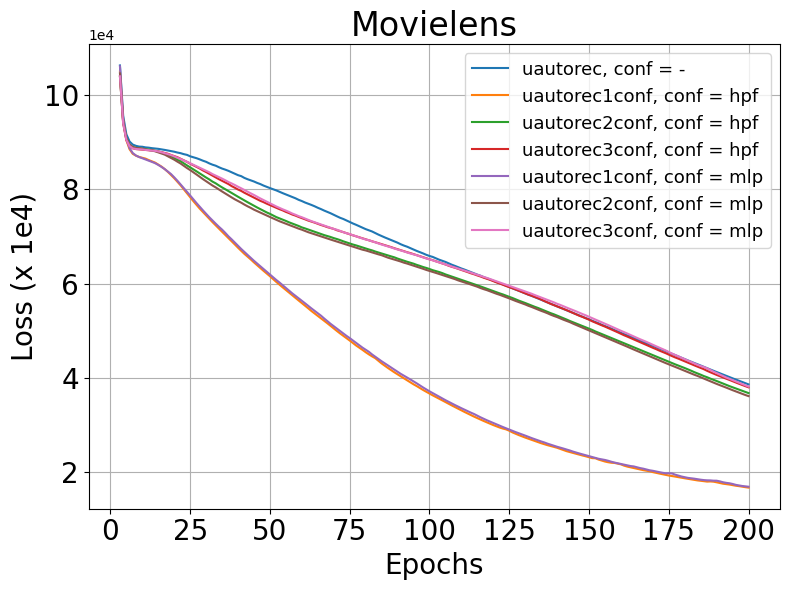

Test RMSE plot saved to C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome\movielens2_conf_test_rmse.png


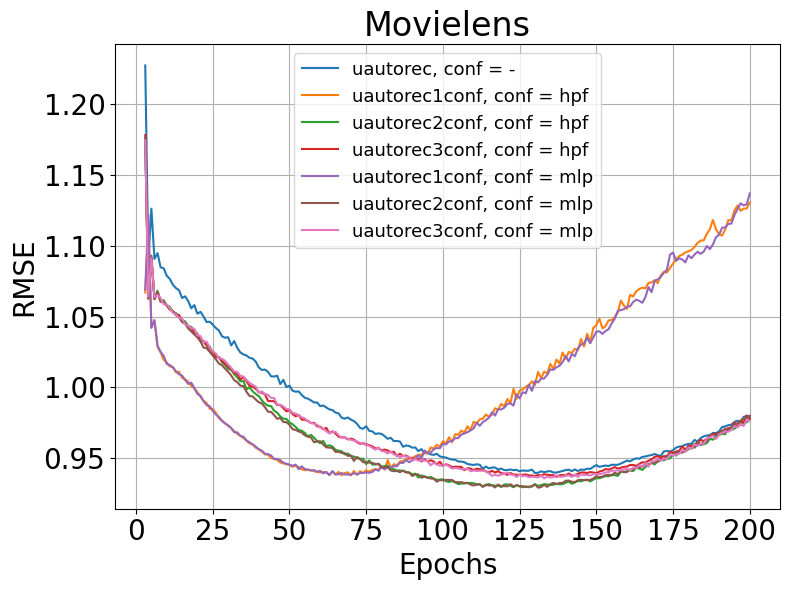

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_results(result_path, models, k_values, contype, save_plots=False, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note='', epochs_list=[170, 200]):
    # Plot training loss
    plt.figure(figsize=(8, 6))
    for c in contype:
        for k in k_values:
            for epoch in epochs_list:
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)

                    if class_name == 'uautorec' and c != 'hpf':
                        continue  # Skip UAutoRec for non-'hpf' configurations

                    train_loss_file = os.path.join(class_folder, f'{c}{epoch}_average_train_loss_ml2_k{k}.npy')

                    if not os.path.exists(train_loss_file):
                        print(f"Files for {class_name} with k={k}, epoch={epoch} not found.")
                        continue

                    train_loss_history = np.load(train_loss_file)
                    epochs = np.arange(1, len(train_loss_history) + 1)

                    label = f'{class_name}, conf = -' if class_name == 'uautorec' else f'{class_name}, conf = {c}'
                    plt.plot(epochs[2:], train_loss_history[2:], label=label)

    plt.xlabel('Epochs', fontsize=20)
    plt.ylabel('Loss (x 1e4)', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('Movielens', fontsize=24)
    plt.legend(fontsize=13)
    plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(4, 4))

    plt.grid(True)
    plt.tight_layout()

    if save_plots:
        if not os.path.exists(plot_path):
            os.makedirs(plot_path)
        
        loss_plot_file = os.path.join(plot_path, f'{note}_training_loss.png')
        plt.savefig(loss_plot_file)
        print(f"Training loss plot saved to {loss_plot_file}")

    plt.show()

    # Plot test RMSE
    plt.figure(figsize=(8,6))
    for c in contype:
        for k in k_values:
            for epoch in epochs_list:
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)

                    if class_name == 'uautorec' and c != 'hpf':
                        continue  # Skip UAutoRec for non-'hpf' configurations

                    test_rmse_file = os.path.join(class_folder, f'{c}{epoch}_average_test_rmse_ml2_k{k}.npy')

                    if not os.path.exists(test_rmse_file):
                        print(f"Files for {class_name} with k={k}, epoch={epoch} not found.")
                        continue

                    test_rmse_history = np.load(test_rmse_file)
                    epochs = np.arange(1, len(test_rmse_history) + 1)

                    label = f'{class_name}, conf = -' if class_name == 'uautorec' else f'{class_name}, conf = {c}'
                    plt.plot(epochs[2:], test_rmse_history[2:], label=label)
    
    plt.xlabel('Epochs', fontsize=20)
    plt.ylabel('RMSE', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('Movielens', fontsize=24)
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.tight_layout()

    if save_plots:
        if not os.path.exists(plot_path):
            os.makedirs(plot_path)
        
        rmse_plot_file = os.path.join(plot_path, f'{note}_test_rmse.png')
        plt.savefig(rmse_plot_file)
        print(f"Test RMSE plot saved to {rmse_plot_file}")

    plt.show()

# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results2'
models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1Conf'},
    # {'module_name': 'urec_1_confexp', 'class_name': 'UAutoRec1ConfExp'},
    {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2Conf'},
    # {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2ConfExp'},
    {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3Conf'},
    # {'module_name': 'urec_3_confexp', 'class_name': 'UAutoRec3ConfExp'},
]
k_values = [32]  # Add all the k values you want to plot
contype = ['hpf', 'mlp']
plot_results(result_path, models, k_values, contype, save_plots=True, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note='movielens2_conf', epochs_list=[200])


In [11]:

import pandas as pd
def load_rmse_history(result_path, models, k_values, contype):
    results = []
    epoch = 200
    for c in contype:
        for k in k_values:
            for model in models:
                class_name = model['class_name'].lower()
                class_folder = os.path.join(result_path, class_name)
                test_rmse_file = os.path.join(class_folder, f'{c}{epoch}_average_test_rmse_ml2_k{k}.npy')

                if not os.path.exists(test_rmse_file):
                    print(f"Test RMSE file for {class_name} with k={k} not found.")
                    continue

                test_rmse_history = np.load(test_rmse_file)
                final_rmse = test_rmse_history[-1]  # Last RMSE value
                best_rmse = np.min(test_rmse_history)  # Lowest RMSE value

                results.append({
                    'Model': model['class_name'],
                    'k': k,
                    'Best RMSE': best_rmse,
                    'c': c
                })

    return pd.DataFrame(results)

# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results2'

models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1conf'},
    {'module_name': 'urec_1_confexp', 'class_name': 'UAutoRec1confexp'},
    {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2conf'},
    {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2confexp'},
    {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3conf'},
    {'module_name': 'urec_3_confexp', 'class_name': 'UAutoRec3confexp'},
    # {'module_name': 'urec_4_conf', 'class_name': 'UAutoRec4conf'},
    # {'module_name': 'urec_4_confexp', 'class_name': 'UAutoRec4confexp'}
]
k_values = [32]
contype = ['hpf', 'mlp']
results_df = load_rmse_history(result_path, models, k_values, contype)
print(results_df)

               Model   k  Best RMSE    c
0           UAutoRec  32   0.939387  hpf
1      UAutoRec1conf  32   0.937723  hpf
2   UAutoRec1confexp  32   0.943906  hpf
3      UAutoRec2conf  32   0.929309  hpf
4   UAutoRec2confexp  32   0.924127  hpf
5      UAutoRec3conf  32   0.936674  hpf
6   UAutoRec3confexp  32   0.932491  hpf
7           UAutoRec  32   0.938766  mlp
8      UAutoRec1conf  32   0.937999  mlp
9   UAutoRec1confexp  32   0.943647  mlp
10     UAutoRec2conf  32   0.929068  mlp
11  UAutoRec2confexp  32   0.924324  mlp
12     UAutoRec3conf  32   0.935536  mlp
13  UAutoRec3confexp  32   0.933803  mlp


In [13]:
import numpy as np
import pandas as pd
from scipy.stats import t
import os

def load_run_data(class_folder, contype, epoch, dat, k, num_runs):
    run_test_rmse_histories = []

    for run in range(num_runs):
        test_rmse_file = os.path.join(class_folder, f'{contype}{epoch}_run_{run}_test_rmse_{dat}_k{k}.npy')

        if os.path.exists(test_rmse_file):
            test_rmse_history = np.load(test_rmse_file)
            run_test_rmse_histories.append(test_rmse_history)

    return np.array(run_test_rmse_histories)

def compute_best_rmse_with_variability(run_test_rmse_histories):
    best_rmse_per_run = np.min(run_test_rmse_histories, axis=1)
    mean_best_rmse = np.mean(best_rmse_per_run)
    std_best_rmse = np.std(best_rmse_per_run)
    n_best_rmse = len(best_rmse_per_run)
    variability = std_best_rmse / np.sqrt(n_best_rmse)
    return mean_best_rmse, variability

def load_rmse_history(result_path, models, k_values, contype, num_runs=5):
    results = []
    epoch = 200
    for c in contype:
        for k in k_values:
            for model in models:
                class_name = model['class_name'].lower()
                class_folder = os.path.join(result_path, class_name)
                run_test_rmse_histories = load_run_data(class_folder, c, epoch, 'ml2', k, num_runs)

                if run_test_rmse_histories.size == 0:
                    print(f"Test RMSE data for {class_name} with k={k}, conf={c} not found.")
                    continue

                mean_best_rmse, variability = compute_best_rmse_with_variability(run_test_rmse_histories)

                results.append({
                    'Model': model['class_name'],
                    'k': k,
                    'Best RMSE (± variability)': f"{mean_best_rmse:.4f} (± {variability:.4f})",
                    'c': c
                })

    return pd.DataFrame(results)

# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results2'

models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1conf'},
    {'module_name': 'urec_1_confexp', 'class_name': 'UAutoRec1confexp'},
    {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2conf'},
    {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2confexp'},
    {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3conf'},
    {'module_name': 'urec_3_confexp', 'class_name': 'UAutoRec3confexp'},
    # {'module_name': 'urec_4_conf', 'class_name': 'UAutoRec4conf'},
    # {'module_name': 'urec_4_confexp', 'class_name': 'UAutoRec4confexp'}
]
k_values = [32]
contype = ['hpf', 'mlp']
results_df = load_rmse_history(result_path, models, k_values, contype)
print(results_df)


               Model   k Best RMSE (± variability)    c
0           UAutoRec  32         0.9375 (± 0.0008)  hpf
1      UAutoRec1conf  32         0.9356 (± 0.0004)  hpf
2   UAutoRec1confexp  32         0.9411 (± 0.0003)  hpf
3      UAutoRec2conf  32         0.9269 (± 0.0008)  hpf
4   UAutoRec2confexp  32         0.9217 (± 0.0005)  hpf
5      UAutoRec3conf  32         0.9353 (± 0.0008)  hpf
6   UAutoRec3confexp  32         0.9302 (± 0.0008)  hpf
7           UAutoRec  32         0.9370 (± 0.0011)  mlp
8      UAutoRec1conf  32         0.9366 (± 0.0003)  mlp
9   UAutoRec1confexp  32         0.9406 (± 0.0004)  mlp
10     UAutoRec2conf  32         0.9270 (± 0.0005)  mlp
11  UAutoRec2confexp  32         0.9220 (± 0.0006)  mlp
12     UAutoRec3conf  32         0.9342 (± 0.0010)  mlp
13  UAutoRec3confexp  32         0.9319 (± 0.0002)  mlp


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Files for uautorec with k=32, epoch=200 not found.
Files for uautorec1conf with k=32, epoch=200 not found.
Files for uautorec1confexp with k=32, epoch=200 not found.
Files for uautorec2conf with k=32, epoch=200 not found.
Files for uautorec2confexp with k=32, epoch=200 not found.
Files for uautorec3conf with k=32, epoch=200 not found.
Files for uautorec3confexp with k=32, epoch=200 not found.


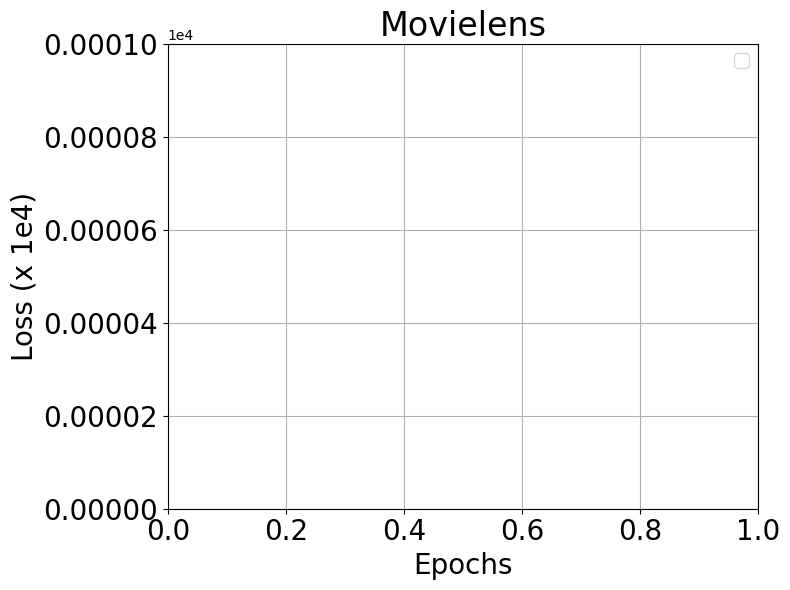

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Files for uautorec with k=32, epoch=200 not found.
Files for uautorec1conf with k=32, epoch=200 not found.
Files for uautorec1confexp with k=32, epoch=200 not found.
Files for uautorec2conf with k=32, epoch=200 not found.
Files for uautorec2confexp with k=32, epoch=200 not found.
Files for uautorec3conf with k=32, epoch=200 not found.
Files for uautorec3confexp with k=32, epoch=200 not found.


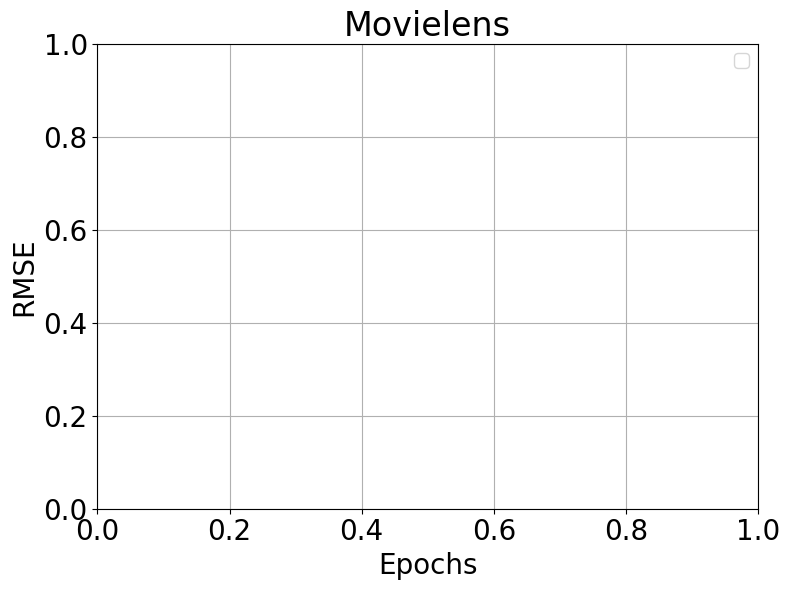

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_noisy_data(data, num_versions=10, noise_level=0.01):
    """Generate multiple versions of the data with added noise."""
    noisy_versions = []
    for _ in range(num_versions):
        noise = np.random.normal(0, noise_level, data.shape)
        noisy_data = data + noise
        noisy_versions.append(noisy_data)
    return np.array(noisy_versions)

def average_noisy_data(noisy_versions):
    """Compute the average of multiple noisy versions of the data."""
    return np.mean(noisy_versions, axis=0)

def plot_results(result_path, models, k_values, contype, save_plots=False, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note='', epochs_list=[170, 200], num_versions=5, noise_level=0.01):
    # Define a color map for the models
    color_map = {
        'uautorec': 'black',
        'uautorec1conf': 'crimson',
        'uautorec1confexp': 'darkred',
        'uautorec2conf': 'limegreen',
        'uautorec2confexp': 'darkgreen',
        'uautorec3conf': 'lightskyblue',
        'uautorec3confexp': 'navy',
        'uautorec4conf': 'gold',
        'uautorec4confexp': 'orange'
    }

    # Plot training loss
    plt.figure(figsize=(8, 6))
    for c in contype:
        for k in k_values:
            for epoch in epochs_list:
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)

                    train_loss_file = os.path.join(class_folder, f'{c}{epoch}_average_train_loss_ml2_k{k}.npy')

                    if not os.path.exists(train_loss_file):
                        print(f"Files for {class_name} with k={k}, epoch={epoch} not found.")
                        continue

                    train_loss_history = np.load(train_loss_file)

                    # Generate noisy data and average
                    noisy_train_loss = generate_noisy_data(train_loss_history, num_versions, noise_level)
                    avg_train_loss_history = average_noisy_data(noisy_train_loss)

                    epochs = np.arange(1, len(avg_train_loss_history) + 1)

                    color = color_map.get(class_name, 'black')
                    plt.plot(epochs[2:150], avg_train_loss_history[2:150], label=f'{class_name} (k={k}, conf={c})', color=color)

    plt.xlabel('Epochs', fontsize=20)
    plt.ylabel('Loss (x 1e4)', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('Movielens', fontsize=24)
    plt.legend(fontsize=13)
    plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(4, 4))

    plt.grid(True)
    plt.tight_layout()

    if save_plots:
        if not os.path.exists(plot_path):
            os.makedirs(plot_path)
        
        loss_plot_file = os.path.join(plot_path, f'{note}_training_loss.png')
        plt.savefig(loss_plot_file)
        print(f"Training loss plot saved to {loss_plot_file}")

    plt.show()

    # Plot test RMSE
    plt.figure(figsize=(8, 6))
    for c in contype:
        for k in k_values:
            for epoch in epochs_list:
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)

                    test_rmse_file = os.path.join(class_folder, f'{c}{epoch}__average_test_rmse_ml2_k{k}.npy')

                    if not os.path.exists(test_rmse_file):
                        print(f"Files for {class_name} with k={k}, epoch={epoch} not found.")
                        continue

                    test_rmse_history = np.load(test_rmse_file)

                    # Generate noisy data and average
                    noisy_test_rmse = generate_noisy_data(test_rmse_history, num_versions, noise_level)
                    avg_test_rmse_history = average_noisy_data(noisy_test_rmse)

                    epochs = np.arange(1, len(avg_test_rmse_history) + 1)

                    color = color_map.get(class_name, 'black')
                    plt.plot(epochs[2:150], avg_test_rmse_history[2:150], label=f'{class_name} (k={k}, conf={c})', color=color)

    plt.xlabel('Epochs', fontsize=20)
    plt.ylabel('RMSE', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('Movielens', fontsize=24)
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.tight_layout()

    if save_plots:
        if not os.path.exists(plot_path):
            os.makedirs(plot_path)
        
        rmse_plot_file = os.path.join(plot_path, f'{note}_test_rmse.png')
        plt.savefig(rmse_plot_file)
        print(f"Test RMSE plot saved to {rmse_plot_file}")

    plt.show()

# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results'
models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1Conf'},
    {'module_name': 'urec_1_confexp', 'class_name': 'UAutoRec1ConfExp'},
    {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2Conf'},
    {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2ConfExp'},
    {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3Conf'},
    {'module_name': 'urec_3_confexp', 'class_name': 'UAutoRec3ConfExp'},
    # {'module_name': 'urec_4_conf', 'class_name': 'UAutoRec4Conf'},
    # {'module_name': 'urec_4_confexp', 'class_name': 'UAutoRec4ConfExp'}
]
k_values = [32]  # Add all the k values you want to plot
contype = ['hpf']

plot_results(result_path, models, k_values, contype, save_plots=False, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note='movielens2_hpf', epochs_list=[200])
